## Gradient updates in logistic regression for binary classification

- Predicted probabilities, $\hat{y}$, and Sigmoid function $\sigma (\cdot)$

For an example $i$, we have feature vector $\vec{x}_i = [x_{i1}, x_{i2}, \cdots, x_{ip}]^T$
$$ z_i = \vec{w}^T \cdot \vec{x}_i + b $$
$$ \hat{y}_i = \sigma(z_i) = \frac{1}{1+e^{-z_i}} = \frac{1}{1+e^{-\vec{w}^T \vec{x}_i-b}} \in [0,1] $$

General estimated probabilities or likelihood of observing the data $(\vec{x}_i, y_i)$:

$$ \Pr(y_i | \vec{x}_i) = \hat{y_i}^{y_i} \cdot (1-\hat{y}_i)^{1-y_i} $$

$$ \Pr(y_i | \vec{w}, \vec{x}_i) = (\frac{1}{1+e^{-\vec{w}^T\vec{x}_i - b}})^{y_i} \cdot (\frac{e^{-\vec{w}^T\vec{x}_i-b}}{1 + e^{\vec{w}^T \vec{x} - b }})^{1-y_i} $$

- Entire dataset with $N$ samples, that likelihood (MLE) and its log likelihood (for convience):
$$ L = \prod_{i=1}^N \Pr(y_i | x_i) = \prod_{i=1}^N (\frac{1}{1+e^{-\vec{w}^T\vec{x}_i - b}})^{y_i} (\frac{e^{-\vec{w}^T\vec{x}_i+b}}{1 + e^{-\vec{w}^T \vec{x} -b }})^{1-y_i} $$

$$ \log L = \sum_{i=1}^N [ y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i) ] $$

- Max log-likelihood = Min negative log-likelihood

$$ Loss(y, \hat{y}) = - \log L = - \sum_{i=1}^N [ y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i) ] $$

Why? MLE aims to maximize $L$ by finding the $W$ and $b$ params that make the $\Pr(y|x)$ most likely. But gradient descent is for minimization problem for loss function, so we want a negative log likelihood.

- Training loss for an example and gradients

$$ \vec{w}^{*} = \arg\min_{\vec{w}} Loss(\vec{w}) $$

If we have $p$ features, we have $p$ parameters for the $\vec{w}$ which is $[w_1, w_2, \cdots, w_p]$. To minimize our cost function, we need to run the gradient descent on each parameter. We need to update each parameter simultaneously for each training sample $(O(N \times p)$) if brute force. 

For $\vec{x}_i$ in $X$ ($N$ samples), and then for $\vec{w}_j$ in $W$ ($p$ features) with the first set of parameters initialized.

1. Calculate $\hat{y}_i$
2. Gradient for each $w_j$
 $$\frac{\partial Loss(\vec{w})}{\partial w_j} = \frac{\partial Loss}{\partial \hat{y_i}} \frac{\partial \hat{y_i}}{\partial z_i} \frac{\partial z_i}{\partial w_j} = - \sum_{i=1}^N [\frac{y_i}{\hat{y}_i} - \frac{1-y_i}{1-\hat{y}_i}] \cdot \hat{y}_i(1-\hat{y}_i) \cdot x_{i,j} = - \sum_{i=1}^N (y_i - \hat{y}_i)x_{i, j} $$
3. Update
$$ w_j = w_j - \eta \frac{\partial Loss(\vec{w})}{\partial w_j}  = w_j - \eta \sum_{i=1}^N (y_i - \hat{y}_i)x_{i, j}$$

## Binary-class with gradient descent on log loss


epoch 0
feature 0 [253.85308605]
feature 1 [252.69318705]
feature 2 [252.03818375]
feature 3 [251.07456108]
feature 4 [250.15459244]
feature 5 [248.98802294]
feature 6 [248.14251822]
feature 7 [247.92729866]
feature 8 [247.73413734]
feature 9 [246.93601619]
feature 10 [243.60945911]
feature 11 [243.42557551]
feature 12 [242.90870849]
feature 13 [242.74981969]
feature 14 [242.4935416]
feature 15 [240.69735947]
feature 16 [238.41006357]
feature 17 [237.316926]
feature 18 [236.0747434]
feature 19 [235.21083658]
feature 20 [232.34161374]
feature 21 [231.48588458]
feature 22 [230.74651636]
feature 23 [230.06666113]
feature 24 [229.42994428]
feature 25 [229.21856524]
feature 26 [228.98619251]
feature 27 [228.8915925]
feature 28 [228.75450733]
feature 29 [228.64313236]

epoch 1
feature 0 [227.73609921]
feature 1 [226.96883702]
feature 2 [226.50826784]
feature 3 [225.88898888]
feature 4 [225.29275247]
feature 5 [224.43851354]
feature 6 [223.70706936]
feature 7 [223.58820673]
feature 8 [223.52

Text(0, 0.5, 'log loss')

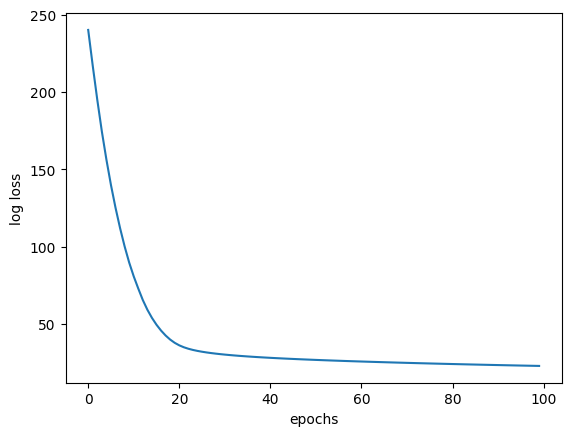

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, log_loss, confusion_matrix
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo, list_available_datasets
import numpy as np
np.random.seed(123)
data = fetch_ucirepo(id=17)["data"]
X = data.features
y = np.array(data.targets["Diagnosis"].apply(lambda x: 1.0 if x=="M" else 0.0))

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

def cross_binary_log_loss(y_real, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon) # to avoid log(0)
    return - (y_real * np.log(y_pred) + (1.0 - y_real) * np.log(1.0 - y_pred))

def gradient_loss_wrt_wj_bj(y_real, y_pred, x_ij):
    grad_wj = np.sum((y_pred - y_real) @ x_ij)
    grad_bj = np.sum((y_pred - y_real))
    return grad_wj, grad_bj

def sigmoid(z):
    if z >= 10:
        z = 10
    elif z <= -10:
        z = -10
    return 1 / (1 + np.exp(-z))

# for plotting:
list_total_logloss = []

# initialize weight params
weight_vector = np.random.random(X_train.shape[1])
bias_scalar = np.random.random(1)
lr = 0.001
epochs = 100

# multiple iterations/epochs
for epoch in range(epochs):
    print()
    print("epoch", epoch)
    avg_logloss_epoch = 0

    # one iteration:
    for j, w in enumerate(weight_vector):
        total_logloss = 0
        y_pred = np.empty(0)
        x_ij_vector = np.empty(0)

        for i, x_i in enumerate(X_train):
            z_i = weight_vector @ x_i + bias_scalar
            y_pred_i = sigmoid(z_i)
            # y_pred_i = 1.0 if y_pred_i_proba >= 0.5 else 0.0

            # for each sample: 
            logloss = cross_binary_log_loss(y_train[i], y_pred_i) 
            total_logloss += logloss

            # for gradient update later
            y_pred = np.append(y_pred, y_pred_i)
            x_ij_vector = np.append(x_ij_vector, x_i[j])

        # update
        grad_wj, grad_bj = gradient_loss_wrt_wj_bj(y_train, y_pred, x_ij_vector)
        weight_vector[j] = w - lr*grad_wj
        bias_scalar = bias_scalar - lr*grad_bj

        print(f"feature {j}", total_logloss)
        avg_logloss_epoch += total_logloss / len(weight_vector)
    
    list_total_logloss.append(avg_logloss_epoch)


plt.plot(range(epochs), list_total_logloss)
plt.xlabel("epochs")
plt.ylabel("log loss")

In [203]:
# validation
pred_total_logloss = 0
y_pred = np.empty(0)

z_pred = X_valid @ weight_vector + bias_scalar

for idx, z_i in enumerate(z_pred):
    y_pred_i_proba = sigmoid(z_i)
    y_pred_i = 1.0 if y_pred_i_proba > 0.5 else 0.0
    y_pred = np.append(y_pred, y_pred_i)

    logloss = cross_binary_log_loss(y_valid[idx], y_pred_i)
    pred_total_logloss += logloss

print(pred_total_logloss)

print("portion of incorrect classification:", np.sum(y_pred != y_valid) / y_valid.shape[0])
    

207.23585675918488
portion of incorrect classification: 0.04195804195804196


## Multi-class 

For multi-classification, logistic regression would use softmax function to convert the raw values into probabilities. 

- Forward pass and softmax ($C$ is the number of classes, and $z_c$ is the logit for class $c$): compute the logits ($z$) from the input features
  $$\Pr(y_i = c \mid x) = \frac{e^{z_c}}{\sum_{j=1}^C e^{z_j}}$$

- Prediction: for a given example, choose the class with the highest probability: $$\hat{y} = \arg\max(\Pr)$$

- Loss -- categorical cross-entropy log loss for training ($y_c$ is the one-hot encoded label (1 if the sample belongs to class $c$, else 0):
  $$Loss = - \sum_{c=1}^C y_c \log(\hat{y}_c)$$

- Gradient update:
  $$\frac{\partial Loss}{\partial w_j} = \frac{\partial \text{Loss}}{\partial z_c} \frac{\partial z_c}{\partial w_j} = \sum_{c=1}^C \sum_{i=1}^N (\hat{y}_{c, i} - y_{c, i})\cdot x_{i, j} $$
  $$w_j = w_j - \eta \cdot \frac{\partial Loss}{\partial w_j}$$

Since it would take quite some time to implement these from scratch, I followed the sklearn code.

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, log_loss, confusion_matrix

from ucimlrepo import fetch_ucirepo, list_available_datasets
heart_disease = fetch_ucirepo(id=45) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

mice_imputer = IterativeImputer(random_state=123) # must have no NaNs
X = mice_imputer.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, stratify=y,
    test_size=0.25, random_state=123)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

multi_class_model = LogisticRegression(
    penalty = "l2", # l2 supports multinominal
    tol = 0.0001,
    C = 0.01, # smaller values imply stronger regularization, reduce overfitting
    class_weight = "balanced",
    random_state = 123,
    solver = "lbfgs",
    max_iter = 200,
    # multi_class = "multinomial", # API changed
    verbose = 0
)

# multi_class_model = LogisticRegressionCV(
#     cv=5,
#     penalty = "l2",
#     tol = 1e-4,
#     # C = 1.0,
#     class_weight = None,
#     random_state = 123,
#     solver = "lbfgs",
#     max_iter = 200,
#     # multi_class = "multinomial", # API changed
#     verbose = 0
# )

multi_class_model.fit(X_train, y_train)
y_preds = multi_class_model.predict(X_valid)
y_preds_probs = multi_class_model.predict_proba(X_valid)

accuracy = accuracy_score(y_valid, y_preds)
precision = precision_score(y_valid, y_preds, average='weighted')
recall = recall_score(y_valid, y_preds, average='weighted')
f1 = f1_score(y_valid, y_preds, average='weighted')

roc_auc = roc_auc_score(y_valid, y_preds_probs, multi_class='ovr')

print(accuracy, precision, recall, f1, roc_auc)
multi_class_model.coef_ # (n_classes, n_features)

0.5921052631578947 0.561654135338346 0.5921052631578947 0.5594253219080089 0.7682059222370341


array([[-0.08843996, -0.10681667, -0.21039802, -0.02031334, -0.0129146 ,
        -0.01217517, -0.07925308,  0.13936476, -0.13266781, -0.14694061,
        -0.08734563, -0.21866621, -0.18266378],
       [-0.00627953,  0.03609585, -0.0142747 ,  0.00220479,  0.00758366,
        -0.04470998, -0.01094598,  0.01914847,  0.00836041, -0.10161291,
        -0.08410252, -0.0787852 , -0.03746149],
       [ 0.02179476,  0.03913942,  0.09711474, -0.04146647,  0.06054844,
         0.12798226, -0.05106097, -0.06621271,  0.05177281,  0.06740908,
         0.00811835,  0.04009986,  0.0677462 ],
       [-0.09880347, -0.0062584 ,  0.05792577,  0.00400038, -0.05066756,
         0.06595486,  0.00230296, -0.09269345,  0.06455014,  0.03969532,
         0.0484704 ,  0.06538833,  0.10801748],
       [ 0.17172819,  0.0378398 ,  0.06963221,  0.05557464, -0.00454994,
        -0.13705198,  0.13895706,  0.00039293,  0.00798446,  0.14144912,
         0.1148594 ,  0.19196322,  0.04436159]])

Given a new instance with a feature vector:
- Repeat the same dot product for all classes to get logits for each class (coef_i @ feature_vector for each logit $i$)
- the softmax function gives the probabilities for each class, and the model selects the class with the highest probability as the prediction.